In [12]:
import pandas as pd
import numpy as np

In [13]:
import torch

torch.cuda.is_available()

True

In [14]:
from fastai.vision.all import untar_data, URLs

path = untar_data(URLs.MNIST) 

path

Path('/home/t1nnur/.fastai/data/mnist_png')

In [15]:
from fastai.vision.all import ImageDataLoaders

dls = ImageDataLoaders.from_folder(path, train='training', valid='testing')

In [16]:
from fastai.vision.all import vision_learner, resnet18, accuracy, cnn_learner

learner = cnn_learner(dls, resnet18, metrics=accuracy)

/home/t1nnur/projects/python/ml-tutorials/.venv/lib/python3.12/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [17]:
learner.fine_tune(2)

epoch     train_loss  valid_loss  accuracy  time    
0         0.682471    0.465699    0.851600  00:14                                          
epoch     train_loss  valid_loss  accuracy  time    
0         0.115424    0.058187    0.981600  00:22                                          
1         0.054528    0.035254    0.988300  00:22                                          


Prediction: 4                                                        
Accuracy: 0.43150562047958374


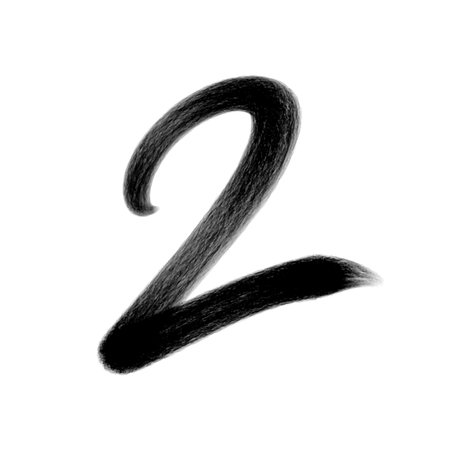

In [18]:
from fastai.vision.all import PILImage

img = PILImage.create('/home/t1nnur/Pictures/2.jpg')

prediction, pred_id, accuracy = learner.predict(img)

print(f"Prediction: {prediction}")
print(f"Accuracy: {accuracy[pred_id]}")
img

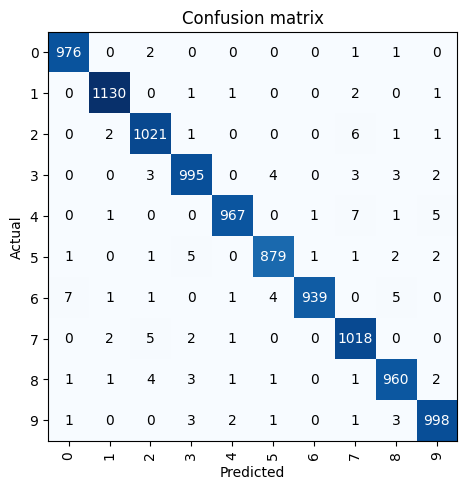

In [19]:
from fastai.vision.all import ClassificationInterpretation

interpretation = ClassificationInterpretation.from_learner(learner)
interpretation.plot_confusion_matrix()

In [20]:
learner.export('mnist.pkl')

In [21]:
from fastai.vision.all import load_learner

model = load_learner('/home/t1nnur/.fastai/data/mnist_png/mnist.pkl')
model